In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noAirTemp_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,101.22,0.0


In [3]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 50000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("noAirTemp_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[-0.00255288]
 [ 0.00115081]
 [-0.01753368]
 [-0.00031513]
 [ 0.062535  ]
 [ 0.1582114 ]
 [-0.00265738]] 
 bias: 0.67091656 
 loss: 0.04722996 

step: 20000 
 w: 
 [[ 4.9728354e-05]
 [ 3.8759718e-03]
 [-8.9367339e-03]
 [-2.7141441e-05]
 [ 6.8342969e-02]
 [-3.3164653e-04]
 [ 3.2438606e-04]] 
 bias: -0.058596626 
 loss: 0.035125542 

step: 30000 
 w: 
 [[ 8.3820720e-05]
 [ 3.8421734e-03]
 [-9.0232985e-03]
 [-2.0511419e-05]
 [ 6.8341710e-02]
 [ 7.2207366e-04]
 [ 5.7321048e-04]] 
 bias: -0.09029817 
 loss: 0.035118286 

step: 40000 
 w: 
 [[ 8.3930725e-05]
 [ 3.8420630e-03]
 [-9.0235807e-03]
 [-2.0490415e-05]
 [ 6.8341702e-02]
 [ 7.2549656e-04]
 [ 5.7401811e-04]] 
 bias: -0.09040109 
 loss: 0.03511828 

step: 50000 
 w: 
 [[ 8.3933810e-05]
 [ 3.8420639e-03]
 [-9.0235770e-03]
 [-2.0488093e-05]
 [ 6.8341695e-02]
 [ 7.2552357e-04]
 [ 5.7402597e-04]] 
 bias: -0.09040186 
 loss: 0.035118286 



In [6]:
y_hat = tf.matmul(x_test, w) + bias

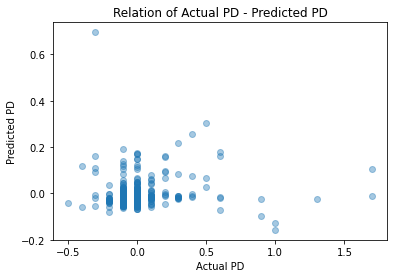

In [7]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.18414398
MAE: 0.08898981
